###**Mounting Google Drive**

In [30]:
# from google.colab import drive
# drive.mount('/content/drive')

### **Global Settings**

In [31]:
rand_state = 42 # 4

# 1 for Manual KFOLD, 0 for CROSS_VAL_SCORE FUNCTION
KFOLD_SELECTION = 0

###**Import Libraries**

In [32]:
from google.colab import files
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import StratifiedKFold,cross_val_score,KFold,StratifiedKFold
from sklearn.metrics import accuracy_score,f1_score
from sklearn.preprocessing import StandardScaler,MinMaxScaler

In [33]:
from sklearn.metrics import confusion_matrix
def plot_conf_matrix(y_test,y_pred,uniqueclassLabel, title="CMatrix"):
  cm = confusion_matrix(y_true=y_test,y_pred=y_pred,labels=uniqueclassLabel)
  plt.figure(figsize=(5,4))
  plt.title(title)
  #ax = plt.subplot()
  sns.heatmap(cm, annot=True,cmap='Blues',
              yticklabels=uniqueclassLabel,xticklabels=uniqueclassLabel,fmt='3g')

###**Import Utility File**

In [34]:
# import sys
# path = "/content/drive/MyDrive/Colab Notebooks/Project_Dissertation"
# sys.path.insert(0,path + "/Code")
# import morningStarUtilities

In [35]:
user = 'nishitgala89'
repo = 'ProjectDissertation'
src_dir = "Code/utilities"
pyfile = "morningStarUtilities.py"

url = f"https://raw.githubusercontent.com/{user}/{repo}/main/{src_dir}/{pyfile}"
!wget --no-cache --backups=1 {url}

--2022-01-04 09:56:56--  https://raw.githubusercontent.com/nishitgala89/ProjectDissertation/main/Code/utilities/morningStarUtilities.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 6484 (6.3K) [text/plain]
Saving to: ‘morningStarUtilities.py’

morningStarUtilitie 100%[===================>]   6.33K  --.-KB/s    in 0s      

2022-01-04 09:56:56 (83.9 MB/s) - ‘morningStarUtilities.py’ saved [6484/6484]



In [36]:
# import subprocess

# result = subprocess.run(["wget", "--no-cache", "--backups=1", url], stderr=subprocess.PIPE, stdout=subprocess.PIPE)
# print(result.stderr.decode("utf-8"))

import morningStarUtilities

### **Import Training Data**

In [37]:
# uploaded = files.upload()
# train_df = pd.read_csv(io.BytesIO(uploaded['morningstar_removedDuplicates_train_withoutM60.csv']))
# train_df = pd.read_csv(path + "/Data/Final_without_missing_values/morningstar_removedDuplicates_train_withoutLogTransform_withoutM60.csv").set_index("SecId")
train_df = pd.read_csv("https://raw.githubusercontent.com/nishitgala89/ProjectDissertation/main/Datasheets/3_Modelling/morningstar_removedDuplicates_train_withoutLogTransform_withoutM60.csv").set_index("SecId")

### **Import Testing Data**

In [38]:
# uploaded = files.upload()
# test_df = pd.read_csv(io.BytesIO(uploaded['morningstar_removedDuplicates_test_withoutM60.csv']))
#test_df = pd.read_csv(path + "/Data/Final_without_missing_values/morningstar_removedDuplicates_test_withoutLogTransform_withoutM60.csv").set_index("SecId")
test_df = pd.read_csv('https://raw.githubusercontent.com/nishitgala89/ProjectDissertation/main/Datasheets/3_Modelling/morningstar_removedDuplicates_test_withoutLogTransform_withoutM60.csv').set_index("SecId")

In [39]:
train_df

,Name,StarRatingM255,SustainabilityRank,Yield_M12,GBRReturnW1,GBRReturnM1,GBRReturnM3,GBRReturnM6,GBRReturnM0,GBRReturnM12,GBRReturnM36,MaxFrontEndLoad,OngoingCostActual,TransactionFeeActual,ManagerTenure,FundTNAV,AverageMarketCapital,MorningstarRiskM255,AlphaM36,BetaM36,R2M36,StandardDeviationM36,SharpeM36,ReturnProfilePreservation,ReturnProfileIncome,ReturnProfileHedging,TrackRecordExtension,Cat_Flex-Cap,Cat_Income,Cat_Large-Cap,Cat_Mid_Small-Cap,Cat_Miscellaneous,Size,Style
SecId,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
F000005ETU,Barings Europe Select A EUR Acc,3,4,0.0,0.85,5.10,9.42,21.86,16.19,38.51,9.65,5.00,1.55,0.34,16.67,1.429875e+09,3978.65175,2,0.16,0.88,96.29,17.05,0.57,3,3,3.0,0,0,0,0,1,0,2,3
F0GBR061MQ,Schroder ISF Sust Swiss Eq C Acc CHF,2,2,0.0,1.93,8.73,10.76,18.20,14.37,27.85,6.80,1.00,1.06,0.08,15.83,3.204443e+07,29776.97728,4,-7.08,1.10,85.04,12.23,0.57,2,3,3.0,0,0,0,0,0,1,1,2
F00000ZS1K,Berenberg European Small Cap B,5,2,0.0,0.15,2.60,11.32,25.96,17.16,51.01,19.50,0.00,0.24,0.23,3.67,6.737833e+08,1698.74791,3,10.19,0.99,86.05,21.60,0.92,3,3,3.0,0,0,0,0,1,0,3,3
F000000ITQ,Candriam Eqs L Eurp Optm Qual I EUR Cap,3,4,0.0,0.79,1.74,7.45,11.52,9.99,21.32,7.40,0.00,0.75,0.22,7.17,8.404491e+08,20347.16148,1,-3.22,0.92,93.88,12.45,0.55,2,3,3.0,0,0,0,1,0,0,1,3
F00000SX9M,Janus Henderson INTECH EurpCor A2 EUR,5,3,0.0,0.66,4.99,9.64,20.98,17.27,37.58,8.79,5.00,1.75,1.05,7.42,1.182744e+08,17329.54942,3,1.56,0.95,92.89,15.08,0.54,3,3,3.0,0,0,0,1,0,0,1,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
F00000XH8D,ASSII-Europ Focus Eq B Acc GBP,3,3,0.0,0.82,3.94,3.87,7.06,5.43,21.80,4.88,5.00,1.03,0.40,1.92,1.041660e+07,34607.87874,3,-1.06,0.99,91.43,16.16,0.36,2,3,3.0,0,0,0,1,0,0,1,3
F0GBR04BDY,MS INVF European Property A,1,5,0.0,1.71,6.65,15.12,20.83,18.35,29.84,1.29,5.75,1.65,0.26,23.75,3.776127e+07,4036.57364,5,-4.73,1.33,89.06,24.26,0.10,3,1,3.0,0,0,0,0,0,1,2,1
F0GBR04SFG,MSMM European Small Cap A,2,3,0.0,-0.06,0.54,9.39,24.04,18.01,43.01,5.45,5.00,2.13,0.59,2.25,5.323047e+07,2464.49043,4,-3.74,1.05,98.54,20.81,0.31,2,2,2.0,0,0,0,0,1,0,2,2


In [40]:
train_df.groupby("StarRatingM255")['GBRReturnM36'].agg(['mean','min','max'])

,mean,min,max
StarRatingM255,,,
1,0.522333,-11.74,8.57
2,3.529188,-4.60,14.50
3,6.013062,-3.30,19.63
4,7.636444,1.06,20.11
5,10.041905,1.75,21.59


### **Defining Training, Testing varibales**

In [41]:
# imp_features = ['SustainabilityRank','GBRReturnM1','GBRReturnM3','GBRReturnM0','GBRReturnM12','GBRReturnM36','OngoingCostActual','TransactionFeeActual','FundTNAV',
# 'AverageMarketCapital','MorningstarRiskM255','AlphaM36','BetaM36','R2M36','StandardDeviationM36','ManagerTenure','SharpeM36','Size','Style']
imp_features = ['SustainabilityRank','GBRReturnM1','GBRReturnM3','GBRReturnM0','GBRReturnM36','OngoingCostActual','TransactionFeeActual','FundTNAV',
'AverageMarketCapital','MorningstarRiskM255','AlphaM36','BetaM36','StandardDeviationM36','SharpeM36','Size','Style']
X_train = train_df[imp_features]
y_train = train_df['StarRatingM255']

X_test = test_df[imp_features]
y_test = test_df['StarRatingM255']

In [42]:
X_train.shape, y_train.shape

((886, 16), (886,))

In [43]:
# X_train = train_df.drop(['StarRatingM255','Name'],axis=1)
# y_train = train_df[['StarRatingM255']]
# X_test = test_df.drop(['StarRatingM255','Name'],axis=1)
# y_test = test_df[['StarRatingM255']]
# X_train.shape, y_train.shape, X_test.shape, y_test.shape

### **Scaling the Data**

In [44]:
scaler = StandardScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

### **Verify the Training and Testing distribution as per Target Variable**

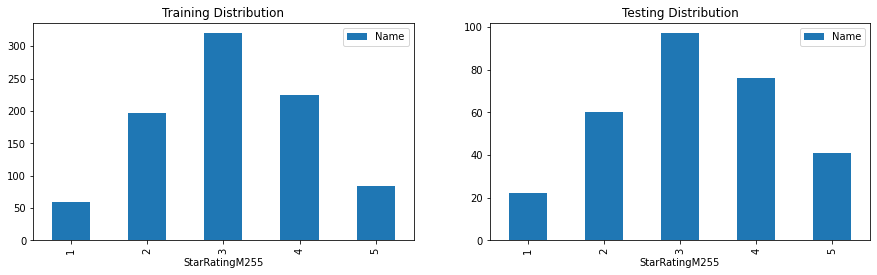

In [45]:
morningStarUtilities.displayBarSubPlots([train_df,test_df],["Training Distribution", "Testing Distribution"],
                   "StarRatingM255")

### **Creating runtime variables**

In [46]:
unique_class_label = list(train_df.StarRatingM255.unique())
unique_class_label.sort()
unique_class_label

[1, 2, 3, 4, 5]

In [47]:
cv_accuracy_metrics = []
cv_balanced_metrics = []
cv_f1_metrics = []

In [48]:
cv_mean = []
cv_std = []
cv_bal_mean = []
cv_bal_std = []
f1_w_mean = []
f1_w_std = []

### **Defining Classifiers**

In [49]:
!pip install catboost

In [50]:
from catboost import CatBoostClassifier
clfs = []
# clfs.append(RandomForestClassifier(n_estimators=250,max_depth=10, max_features='sqrt',
#                                    random_state=rand_state, criterion="gini"))
clfs.append(RandomForestClassifier(n_estimators=350,max_depth=8, max_features=0.64,
                                    random_state=rand_state, criterion="gini"))
clfs.append(CatBoostClassifier(verbose=False, random_state=rand_state, learning_rate=0.05, loss_function='MultiClass',
                               n_estimators =150))
clfs.append(XGBClassifier(n_estimators=250, max_depth=10, random_state=rand_state,verbose=1,learning_rate=0.001,
                          verbosity=1,booster='dart', normalize_type='forest', rate_drop = 0.3, subsample = 0.4,
                          objective='multi:softprob'))
clfs.append(BaggingClassifier(base_estimator=LogisticRegression(max_iter=5000, random_state=rand_state),bootstrap_features=False,
                             max_features=0.7,max_samples=0.6, n_estimators=250, n_jobs=-1))
clfs.append(LogisticRegression(max_iter=1000,random_state=rand_state ))
clfs.append(SVC(probability=True, random_state=rand_state,C=10, kernel='rbf', gamma='auto'))
clfs.append(GradientBoostingClassifier(n_estimators= 400,random_state=rand_state,learning_rate=0.005, max_features = 0.64, min_samples_split=10, min_samples_leaf=25))
len(clfs)

7

In [51]:
for clf in clfs:
  print(clf.__class__.__name__)

RandomForestClassifier
CatBoostClassifier
XGBClassifier
BaggingClassifier
LogisticRegression
SVC
GradientBoostingClassifier


In [52]:
scaled_clf = ['LogisticRegression', 'SVC', 'BaggingClassifier']
test_acc_score=[]
test_f1_score=[]
clfList = [clf.__class__.__name__  for clf in clfs]


### **5-Fold Cross Validation**

In [53]:
if KFOLD_SELECTION == 0 :
  skf = StratifiedKFold(n_splits=5, random_state=rand_state, shuffle=True)
  for clf in clfs:
    if clf.__class__.__name__  in scaled_clf:
      cv_accuracy_metrics.append(cross_val_score(clf, X_train_scaled, y_train, scoring = 'accuracy',
                                        cv = skf,verbose=2,n_jobs=-1))
      cv_balanced_metrics.append(cross_val_score(clf, X_train_scaled, y_train, scoring = 'balanced_accuracy', 
                                        cv = skf,verbose=2,n_jobs=-1))
      cv_f1_metrics.append(cross_val_score(clf, X_train_scaled, y_train, scoring = 'f1_weighted', 
                                        cv = skf,verbose=2,n_jobs=-1))
    
    else:

      cv_accuracy_metrics.append(cross_val_score(clf, X_train, y_train, scoring = 'accuracy',
                                        cv = skf,verbose=2,n_jobs=-1))
      cv_balanced_metrics.append(cross_val_score(clf, X_train, y_train, scoring = 'balanced_accuracy', 
                                        cv = skf,verbose=2,n_jobs=-1))
      cv_f1_metrics.append(cross_val_score(clf, X_train, y_train, scoring = 'f1_weighted', 
                                        cv = skf,verbose=2,n_jobs=-1))
  for clf_result in cv_accuracy_metrics:
    cv_mean.append(clf_result.mean())
    cv_std.append(clf_result.std())

  for clf_result in cv_balanced_metrics:
    cv_bal_mean.append(clf_result.mean())
    cv_bal_std.append(clf_result.std())

  for clf_result in cv_f1_metrics:
    f1_w_mean.append(clf_result.mean())
    f1_w_std.append(clf_result.std())

  result_df = pd.DataFrame({'Classifier' :  [clf.__class__.__name__  for clf in clfs],
                            'CV_Accuracy Mean': cv_mean,'CV_Accuracy Std' : cv_std,
                            'CV_Bal_Accuracy Mean': cv_bal_mean,'CV_Bal_Accuracy Std' : cv_bal_std,
                            'CV_f1_weighted Mean': f1_w_mean,'V_f1_weighted Std' : f1_w_std
                            })

  result_df.sort_values(by='CV_Accuracy Mean',ascending=False, ignore_index=False)
  result_df

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:   10.2s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:   10.2s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:   10.5s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:   10.5s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:   10.5s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:   10.5s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    9.7s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    9.7s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_

## **Prediction Run**

Accuracy Score for RandomForestClassifier  0.47635135135135137
F1 Score for RandomForestClassifier  0.4672232703315626
Accuracy Score for CatBoostClassifier  0.44932432432432434
F1 Score for CatBoostClassifier  0.43635993144250795
Accuracy Score for XGBClassifier  0.4864864864864865
F1 Score for XGBClassifier  0.4804244872879516
Accuracy Score for BaggingClassifier  0.5
F1 Score for BaggingClassifier  0.4872376947665638
Accuracy Score for LogisticRegression  0.5236486486486487
F1 Score for LogisticRegression  0.5169462517808106
Accuracy Score for SVC  0.43243243243243246
F1 Score for SVC  0.4303300577558798
Accuracy Score for GradientBoostingClassifier  0.5101351351351351
F1 Score for GradientBoostingClassifier  0.4975895423506887


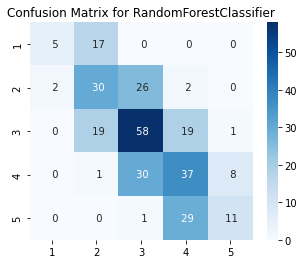

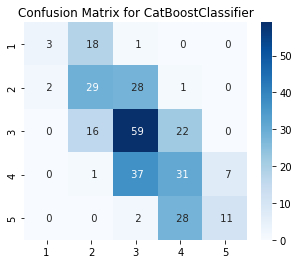

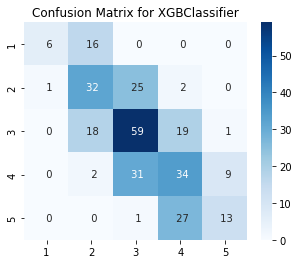

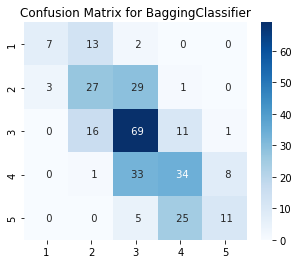

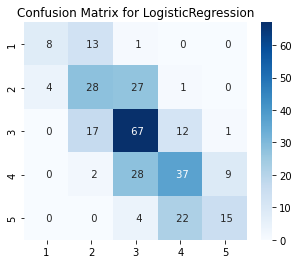

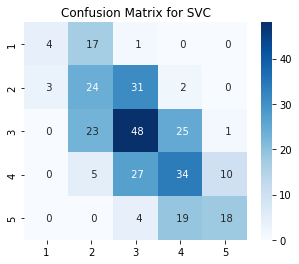

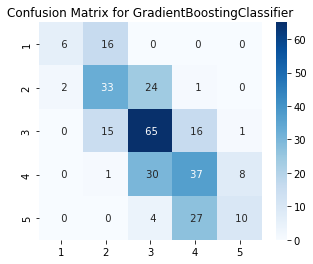

In [54]:
if KFOLD_SELECTION == 0 :
  
  def run_predict(clf):
    if clf.__class__.__name__ in scaled_clf:
      clf = clf.fit(X_train_scaled, y_train)
      y_pred = clf.predict(X_test_scaled)
    else:
      clf = clf.fit(X_train, y_train)
      y_pred = clf.predict(X_test)
    plot_conf_matrix(y_test,y_pred,unique_class_label, title="Confusion Matrix for " + clf.__class__.__name__)
    print("Accuracy Score for " +  clf.__class__.__name__ + "  " 
          + str(accuracy_score(y_test,y_pred)) )
    print("F1 Score for " + clf.__class__.__name__ + "  " + 
          str(f1_score(y_test, y_pred, average='weighted')))
    
    test_acc_score.append(accuracy_score(y_test,y_pred))
    test_f1_score.append(f1_score(y_test, y_pred, average='weighted'))
    
  for clf in clfs:
    run_predict(clf)



In [55]:
if KFOLD_SELECTION == 0 :

  testing_result_df = pd.DataFrame({'Classifier' :  clfList,
                            'Testing_Accuracy': test_acc_score,
                            'Testing_F1-score': test_f1_score                          
                            })    
  testing_result_df.sort_values(by="Testing_Accuracy", ascending=False)

### **New Addition - Manual K-Fold**

In [56]:
if KFOLD_SELECTION == 1 :
  train_df = train_df.reset_index()
  kf = StratifiedKFold(n_splits=5, shuffle=True, random_state=3)
  train_df["kfold"] = -1
  for fold, (train_indicies, validation_indicies) in enumerate(kf.split(X=train_df,y=train_df.StarRatingM255)):
      train_df.loc[validation_indicies, "kfold"] = int(fold)

  train_df.set_index("SecId", inplace=True)
  train_df.kfold.value_counts()

In [57]:
if KFOLD_SELECTION == 1 :
  train_df[(train_df['kfold']==0) & (train_df['StarRatingM255']==3) ]

In [58]:
if KFOLD_SELECTION == 1 :
  train_df.drop(index='F0GBR055SK',inplace=True)
  train_df.kfold.value_counts()

In [59]:
if KFOLD_SELECTION == 1 :

  skf = StratifiedKFold(n_splits=5, random_state=rand_state, shuffle=True)
  for clf in clfs:

    val_preds_CV_list =[]
    test_preds_CV_list = []
    
    for i in range(5):
      X_train_CV = train_df[train_df.kfold != i]
      X_Val_CV = train_df[train_df.kfold == i]

      y_train_CV = X_train_CV['StarRatingM255']
      y_Val_CV = X_Val_CV['StarRatingM255']

      X_train_CV = X_train_CV[imp_features]
      X_Val_CV = X_Val_CV[imp_features]
      
      X_test = test_df[imp_features]
      y_test = test_df['StarRatingM255']
        
      if clf.__class__.__name__  in scaled_clf:
        scaler = StandardScaler()
        scaler.fit(X_train)
        X_train_CV = scaler.transform(X_train_CV)
        X_Val_CV = scaler.transform(X_Val_CV)
        X_test = scaler.transform(X_test)

      clf = clf.fit(X_train_CV, y_train_CV)
      y_val_CV_pred = clf.predict(X_Val_CV)
      # y_test_pred = clf.predict(X_test)

      val_preds_CV_list.append(y_val_CV_pred)
      # test_preds_CV_list.append(y_test_pred)

    val_preds_column_stack = np.column_stack([p for p in val_preds_CV_list])
    # test_preds_column_stack = np.column_stack([p for p in test_preds_CV_list])

    y_val_preds =[]
    for pred in list(val_preds_column_stack):
      p = list(pred)
      y_val_preds.append(max(set(p),key=p.count))
    #print(y_val_preds)

    
    # y_test_preds =[]
    # for pred in list(test_preds_column_stack):
    #   p = list(pred)
    #   y_test_preds.append(max(set(p),key=p.count))
    # #print(y_test_preds)

    y_test_preds = clf.predict(X_test)

    val_score = accuracy_score(y_Val_CV,y_val_preds)
    test_score = accuracy_score(y_test,y_test_preds)

    val_f1 = f1_score(y_Val_CV, y_val_preds, average='weighted')
    test_f1 = f1_score(y_test, y_test_preds, average='weighted')

    # print("Classifier :{}, Validation Score : {}, F1-Score : {}".format(clf.__class__.__name__,val_score,val_f1))
    # print("Classifier :{}, Testing Score : {},  F1-Score : {}".format(clf.__class__.__name__,test_score,test_f1))

    test_acc_score.append(test_score)
    test_f1_score.append(test_f1)

    plot_conf_matrix(y_test,y_test_preds,unique_class_label, title="Confusion Matrix for " + clf.__class__.__name__)

  testing_result_df = pd.DataFrame({'Classifier' :  clfList,
                            'Testing_Accuracy': test_acc_score,
                            'Testing_F1-score': test_f1_score                          
                            })    
  testing_result_df.sort_values(by="Testing_Accuracy", ascending=False)   
    

## **Prediction using Pre-trained Neural Network Model**

In [60]:
import tensorflow as tf
from tensorflow.keras.layers import Dense, Dropout, Input
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam

### Fetching the Saved Model JSON File from Github

In [61]:
import requests, json
from  urllib.request import Request, build_opener
#url = 'https://raw.githubusercontent.com/nishitgala89/ProjectDissertation/main/Code/4_Modelling/Artificial_Neural_Network/Model1/model.json'
url = 'https://raw.githubusercontent.com/nishitgala89/ProjectDissertation/main/Code/4_Modelling/Artificial_Neural_Network/Final_Models/Without_Class_Weights/model_v2.json'
req = Request(url)
opener = build_opener()
f = opener.open(req)
with open('ann_model.json', 'w') as json_file:
    json.dump(json.loads(f.read()), json_file)

In [62]:
with open('/content/ann_model.json', 'r') as model_file:
  json_saved_model = model_file.read()
network_loaded = tf.keras.models.model_from_json(json_saved_model)

### Fetching the Model Weights from Github

In [63]:
src_dir = "Code/4_Modelling/Artificial_Neural_Network/Final_Models/Without_Class_Weights"
weight_file = "model_weights_v2.hdf5"
url = f"https://github.com/{user}/{repo}/blob/main/{src_dir}/{weight_file}?raw=true"

!wget --no-cache --backups=1 {url}

--2022-01-04 10:03:39--  https://github.com/nishitgala89/ProjectDissertation/blob/main/Code/4_Modelling/Artificial_Neural_Network/Final_Models/Without_Class_Weights/model_weights_v2.hdf5?raw=true
Resolving github.com (github.com)... 140.82.113.3
Connecting to github.com (github.com)|140.82.113.3|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://github.com/nishitgala89/ProjectDissertation/raw/main/Code/4_Modelling/Artificial_Neural_Network/Final_Models/Without_Class_Weights/model_weights_v2.hdf5 [following]
--2022-01-04 10:03:39--  https://github.com/nishitgala89/ProjectDissertation/raw/main/Code/4_Modelling/Artificial_Neural_Network/Final_Models/Without_Class_Weights/model_weights_v2.hdf5
Reusing existing connection to github.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/nishitgala89/ProjectDissertation/main/Code/4_Modelling/Artificial_Neural_Network/Final_Models/Without_Class_Weights/model_we

In [64]:
network_loaded.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 11)                187       
                                                                 
 dense_1 (Dense)             (None, 11)                132       
                                                                 
 dropout (Dropout)           (None, 11)                0         
                                                                 
 dense_2 (Dense)             (None, 6)                 72        
                                                                 
 dropout_1 (Dropout)         (None, 6)                 0         
                                                                 
 dense_3 (Dense)             (None, 5)                 35        
                                                                 
Total params: 426
Trainable params: 426
Non-trainable pa

In [65]:
import os
fileNames = list(os.listdir())
fileNames
for fname in fileNames:
  if fname.startswith('model_weights'):
    fsplit = fname.split("?")
    os.rename(fname, fsplit[0])

In [66]:
network_loaded.load_weights('/content/model_weights_v2.hdf5')
network_loaded.compile(loss = 'categorical_crossentropy', optimizer='Adam', metrics=['accuracy'])

In [67]:
network_loaded.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 11)                187       
                                                                 
 dense_1 (Dense)             (None, 11)                132       
                                                                 
 dropout (Dropout)           (None, 11)                0         
                                                                 
 dense_2 (Dense)             (None, 6)                 72        
                                                                 
 dropout_1 (Dropout)         (None, 6)                 0         
                                                                 
 dense_3 (Dense)             (None, 5)                 35        
                                                                 
Total params: 426
Trainable params: 426
Non-trainable pa

In [68]:
len(imp_features)

16

In [69]:
y_pred_loaded = network_loaded.predict(X_test_scaled)
y_pred_loaded = np.argmax(y_pred_loaded, axis=1)
y_pred_loaded +=1

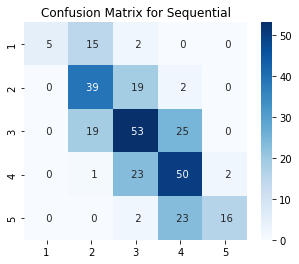

In [70]:
plot_conf_matrix(y_test.values,y_pred_loaded,unique_class_label, title="Confusion Matrix for " + network_loaded.__class__.__name__)

In [71]:
test_acc_score.append(accuracy_score(y_test, y_pred_loaded))
test_f1_score.append(f1_score(y_test, y_pred_loaded, average='weighted'))
clfList.append("Artificial_Neural_Network")

In [72]:
testing_result_df = pd.DataFrame({'Classifier' :  clfList,
                          'Testing_Accuracy': test_acc_score,
                          'Testing_F1-score': test_f1_score                          
                          })    
testing_result_df.sort_values(by="Testing_Accuracy", ascending=False)

,Classifier,Testing_Accuracy,Testing_F1-score
7,Artificial_Neural_Network,0.550676,0.543756
4,LogisticRegression,0.523649,0.516946
6,GradientBoostingClassifier,0.510135,0.497590
3,BaggingClassifier,0.500000,0.487238
2,XGBClassifier,0.486486,0.480424
0,RandomForestClassifier,0.476351,0.467223
1,CatBoostClassifier,0.449324,0.436360
5,SVC,0.432432,0.430330


## **Voting Classifier**

In [73]:
### Creating Estimators list of Tuples
estimators =[]
for clf in clfs:
  estimators.append((clf.__class__.__name__,clf))

#estimators

In [74]:
estimators

[('RandomForestClassifier',
  RandomForestClassifier(max_depth=8, max_features=0.64, n_estimators=350,
                         random_state=42)),
 ('CatBoostClassifier', <catboost.core.CatBoostClassifier at 0x7f182f675890>),
 ('XGBClassifier',
  XGBClassifier(booster='dart', learning_rate=0.001, max_depth=10,
                n_estimators=250, normalize_type='forest',
                objective='multi:softprob', random_state=42, rate_drop=0.3,
                subsample=0.4, verbose=1)),
 ('BaggingClassifier',
  BaggingClassifier(base_estimator=LogisticRegression(max_iter=5000,
                                                      random_state=42),
                    max_features=0.7, max_samples=0.6, n_estimators=250,
                    n_jobs=-1)),
 ('LogisticRegression', LogisticRegression(max_iter=1000, random_state=42)),
 ('SVC', SVC(C=10, gamma='auto', probability=True, random_state=42)),
 ('GradientBoostingClassifier',
  GradientBoostingClassifier(learning_rate=0.005, max_featur

In [75]:
from sklearn.ensemble import VotingClassifier
ensemble= VotingClassifier(estimators=estimators, 
                          voting='soft', 
                          flatten_transform=True)

In [76]:
ensemble = ensemble.fit(X_train_scaled,y_train)

In [77]:
y_ensemble = ensemble.predict(X_test_scaled)

In [78]:
test_acc_score.append(accuracy_score(y_test, y_ensemble))
test_f1_score.append(f1_score(y_test, y_ensemble, average='weighted'))
clfList.append("VotingClassifier")

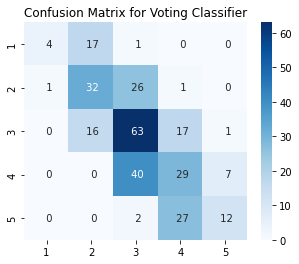

In [79]:
plot_conf_matrix(y_test,y_ensemble,unique_class_label, title="Confusion Matrix for " + "Voting Classifier")

In [80]:
testing_result_df = pd.DataFrame({'Classifier' :  clfList,
                          'Testing_Accuracy': test_acc_score,
                          'Testing_F1-score': test_f1_score                          
                          })    
testing_result_df.sort_values(by="Testing_Accuracy", ascending=False)

,Classifier,Testing_Accuracy,Testing_F1-score
7,Artificial_Neural_Network,0.550676,0.543756
4,LogisticRegression,0.523649,0.516946
6,GradientBoostingClassifier,0.510135,0.497590
3,BaggingClassifier,0.500000,0.487238
2,XGBClassifier,0.486486,0.480424
0,RandomForestClassifier,0.476351,0.467223
8,VotingClassifier,0.472973,0.459890
1,CatBoostClassifier,0.449324,0.436360
5,SVC,0.432432,0.430330


## **Prediction Run for Asia Data (Model Generalization Test as this data is not used in Training)**

In [81]:
asia_df = pd.read_csv('https://raw.githubusercontent.com/nishitgala89/ProjectDissertation/main/Datasheets/3_Modelling/Generalization_Check_Asia_Developed.csv').set_index("SecId")
asia_df = morningStarUtilities.createSize_InvestmentTypeFeature(asia_df)


In [82]:
asia_df[imp_features].isnull().sum()

SustainabilityRank      0
GBRReturnM1             0
GBRReturnM3             0
GBRReturnM0             0
GBRReturnM36            0
OngoingCostActual       0
TransactionFeeActual    0
FundTNAV                1
AverageMarketCapital    0
MorningstarRiskM255     0
AlphaM36                0
BetaM36                 0
StandardDeviationM36    0
SharpeM36               0
Size                    0
Style                   0
dtype: int64

In [83]:
asia_df[asia_df.FundTNAV.isnull()]

,Name,StarRatingM255,SustainabilityRank,CategoryName,Yield_M12,GBRReturnW1,GBRReturnM1,GBRReturnM3,GBRReturnM6,GBRReturnM0,GBRReturnM12,GBRReturnM36,GBRReturnM60,MaxFrontEndLoad,OngoingCostActual,TransactionFeeActual,ManagerTenure,FundTNAV,EquityStyleBox,AverageMarketCapital,MorningstarRiskM255,AlphaM36,BetaM36,R2M36,StandardDeviationM36,SharpeM36,ReturnProfilePreservation,ReturnProfileIncome,ReturnProfileHedging,TrackRecordExtension,Size,Style
SecId,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
F00001071Q,BIEF Emerging Markets A GBP Acc,4,2,Global Emerging Markets Equity,0.62047,1.43,1.64,-3.35,-7.72,0.09,10.79,10.05,NaN,NaN,1.12,1.17,24.08,NaN,2,28614.24791,4,2.47,1.02,89.7,16.24,0.66,3,1,3.0,False,1,2


In [84]:
asia_df.drop(index='F00001071Q',inplace=True)


In [85]:
X_asia = asia_df[imp_features]
y_asia = asia_df['StarRatingM255']
X_asia_scaled = scaler.transform(X_asia)

In [86]:
X_asia.shape, y_asia.shape

((432, 16), (432,))

Accuracy Score for RandomForestClassifier  0.4861111111111111
F1 Score for RandomForestClassifier  0.4589045665133241
Accuracy Score for CatBoostClassifier  0.4050925925925926
F1 Score for CatBoostClassifier  0.3806152184796787
Accuracy Score for XGBClassifier  0.47685185185185186
F1 Score for XGBClassifier  0.4433409167938139
Accuracy Score for BaggingClassifier  0.4791666666666667
F1 Score for BaggingClassifier  0.4657942066514913
Accuracy Score for LogisticRegression  0.49537037037037035
F1 Score for LogisticRegression  0.4782246027968384
Accuracy Score for SVC  0.3333333333333333
F1 Score for SVC  0.32907700442320226
Accuracy Score for GradientBoostingClassifier  0.4861111111111111
F1 Score for GradientBoostingClassifier  0.45338763918268826


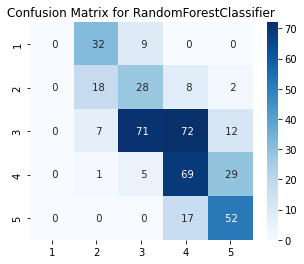

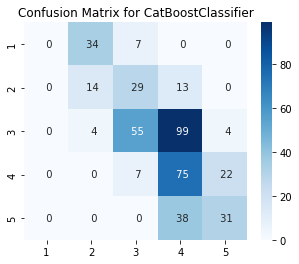

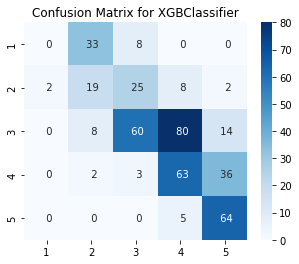

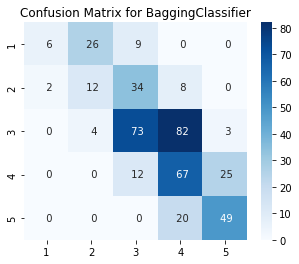

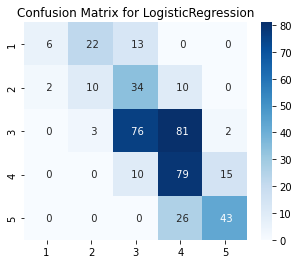

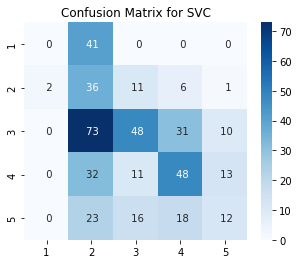

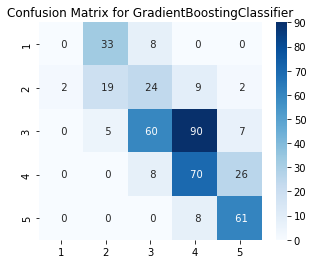

In [87]:
test_acc_score=[]
test_f1_score=[]
clfList = [clf.__class__.__name__  for clf in clfs]


def run_predict_for_untrainedData(clf):
  if clf.__class__.__name__ in scaled_clf:   
    y_pred = clf.predict(X_asia_scaled)
  else:
    y_pred = clf.predict(X_asia)
  plot_conf_matrix(y_asia,y_pred,unique_class_label, title="Confusion Matrix for " + clf.__class__.__name__)
  print("Accuracy Score for " +  clf.__class__.__name__ + "  " 
        + str(accuracy_score(y_asia,y_pred)) )
  print("F1 Score for " + clf.__class__.__name__ + "  " + 
        str(f1_score(y_asia, y_pred, average='weighted')))
  
  test_acc_score.append(accuracy_score(y_asia,y_pred))
  test_f1_score.append(f1_score(y_asia, y_pred, average='weighted'))
  
for clf in clfs:
  run_predict_for_untrainedData(clf)



In [88]:
y_asia_pred = network_loaded.predict(X_asia_scaled)
y_asia_pred = np.argmax(y_asia_pred, axis=1)
y_asia_pred += 1

In [89]:
print("Accuracy Score for " +  network_loaded.__class__.__name__ + "  " 
        + str(accuracy_score(y_asia.values,y_asia_pred)) )
print("F1 Score for " + network_loaded.__class__.__name__ + "  " + 
        str(f1_score(y_asia.values, y_asia_pred, average='weighted')))

Accuracy Score for Sequential  0.5254629629629629
F1 Score for Sequential  0.5176496159393014


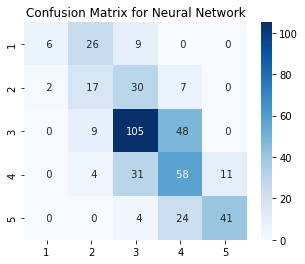

In [90]:
plot_conf_matrix(y_asia,y_asia_pred,unique_class_label, title="Confusion Matrix for Neural Network")

In [91]:
test_acc_score.append(accuracy_score(y_asia,y_asia_pred))
test_f1_score.append(f1_score(y_asia, y_asia_pred, average='weighted'))
clfList.append("Artificial_Neural_Network")

In [92]:
y_ensemble = ensemble.predict(X_asia_scaled)
test_acc_score.append(accuracy_score(y_asia,y_ensemble))
test_f1_score.append(f1_score(y_asia, y_ensemble, average='weighted'))
clfList.append("Voting Classifier")

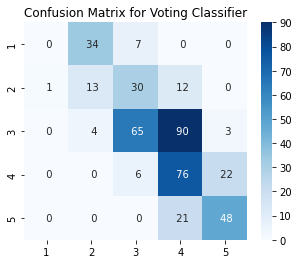

In [93]:
plot_conf_matrix(y_asia,y_ensemble,unique_class_label, title="Confusion Matrix for Voting Classifier")

In [94]:
testing_result_df = pd.DataFrame({'Classifier' :  clfList,
                          'Testing_Accuracy': test_acc_score,
                          'Testing_F1-score': test_f1_score                          
                          })    
testing_result_df.sort_values(by="Testing_Accuracy", ascending=False)

,Classifier,Testing_Accuracy,Testing_F1-score
7,Artificial_Neural_Network,0.525463,0.517650
4,LogisticRegression,0.495370,0.478225
0,RandomForestClassifier,0.486111,0.458905
6,GradientBoostingClassifier,0.486111,0.453388
3,BaggingClassifier,0.479167,0.465794
2,XGBClassifier,0.476852,0.443341
8,Voting Classifier,0.467593,0.440803
1,CatBoostClassifier,0.405093,0.380615
5,SVC,0.333333,0.329077
